In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from quetzal.model import stepmodel

In [2]:
pwd


'/Users/codygelbrich/Desktop/nic/Term_Paper/codycode'

In [3]:
# Load the model with LoS tables from the last exercise
model_path = '../../model/'

sm = stepmodel.read_json(model_path + 'los_tables')

## Step trip generation
In every zone we need to generate a column `emission` and `attraction`. What kind of trips you count to it largely affects the interpretability of your results. If you use employment characteristics only for attraction, your model will only be applicable to commuting questions, but not for shopping or leisure trips. Moreover, the results of a congestion analysis after the assignment step are worthless because the real network load is higher when you consider all demand segments.

In [4]:
# Lets see what data we have
sm.zones.sample(11)

,type,pop,name,emp,id,AREA,pop_dens,emp_dens,geometry
index,,,,,,,,,
zone_7,multipolygon,10901,Suedstadt_Sandberg,4008,6,7505967.16,0.001,0.00053,"MULTIPOLYGON (((9.42932 54.75337, 9.42961 54.7..."
zone_4,multipolygon,12584,Engelsby_Tarup,4393,11,8946281.90,0.001,0.00049,"MULTIPOLYGON (((9.50180 54.80515, 9.50135 54.8..."
zone_0,multipolygon,8034,Westlische_Hoehe,2452,3,4687233.26,0.002,0.00052,"MULTIPOLYGON (((9.40926 54.79851, 9.40782 54.7..."
zone_6,multipolygon,7607,Muerwik-1,4627,9,3549296.74,0.002,0.00130,"MULTIPOLYGON (((9.45215 54.80729, 9.45297 54.8..."
zone_10,multipolygon,8424,Juergensby,3091,7,1402414.74,0.006,0.00220,"MULTIPOLYGON (((9.43616 54.78844, 9.43649 54.7..."
zone_9,multipolygon,6696,Friesiche_Berg,2454,4,4199743.10,0.002,0.00058,"MULTIPOLYGON (((9.37525 54.78545, 9.37456 54.7..."
zone_1,multipolygon,7435,Weiche,2551,5,8073283.42,0.001,0.00032,"MULTIPOLYGON (((9.36144 54.77498, 9.36481 54.7..."
zone_5,multipolygon,8563,Altstadt_Neustadt,3042,1,1050230.54,0.008,0.00290,"MULTIPOLYGON (((9.43615 54.78844, 9.43506 54.7..."
zone_2,multipolygon,6909,Fruerlund,2410,8,2513307.48,0.003,0.00096,"MULTIPOLYGON (((9.43779 54.79169, 9.43770 54.7..."


<AxesSubplot:>

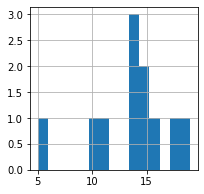

In [5]:
# Let's add the number of shops per zone to add at least this travel purpose
# Use random numbers for the toy model. Normally we would use land use data
# from OpenStreetMap (tutorials available)
# POI = point of interest
sm.zones['POIs'] = np.random.randint(5, 20, len(sm.zones))
# Check the distribution
sm.zones['POIs'].hist(bins=15, figsize=(3,3))

In [6]:
sm.zones

,type,pop,name,emp,id,AREA,pop_dens,emp_dens,geometry,POIs
index,,,,,,,,,,
zone_0,multipolygon,8034,Westlische_Hoehe,2452,3,4687233.26,0.002,0.00052,"MULTIPOLYGON (((9.40926 54.79851, 9.40782 54.7...",14
zone_1,multipolygon,7435,Weiche,2551,5,8073283.42,0.001,0.00032,"MULTIPOLYGON (((9.36144 54.77498, 9.36481 54.7...",16
zone_2,multipolygon,6909,Fruerlund,2410,8,2513307.48,0.003,0.00096,"MULTIPOLYGON (((9.43779 54.79169, 9.43770 54.7...",10
zone_3,multipolygon,12160,Nordstadt,3834,2,4032961.52,0.003,0.00095,"MULTIPOLYGON (((9.42829 54.80005, 9.42828 54.8...",18
zone_4,multipolygon,12584,Engelsby_Tarup,4393,11,8946281.90,0.001,0.00049,"MULTIPOLYGON (((9.50180 54.80515, 9.50135 54.8...",15
zone_5,multipolygon,8563,Altstadt_Neustadt,3042,1,1050230.54,0.008,0.00290,"MULTIPOLYGON (((9.43615 54.78844, 9.43506 54.7...",14
zone_6,multipolygon,7607,Muerwik-1,4627,9,3549296.74,0.002,0.00130,"MULTIPOLYGON (((9.45215 54.80729, 9.45297 54.8...",14
zone_7,multipolygon,10901,Suedstadt_Sandberg,4008,6,7505967.16,0.001,0.00053,"MULTIPOLYGON (((9.42932 54.75337, 9.42961 54.7...",5
zone_8,multipolygon,7607,Muerwik-2,2314,10,2970340.69,0.003,0.00078,"MULTIPOLYGON (((9.49141 54.81826, 9.49151 54.8...",15


In [7]:
# Start with emission and attraction derived from a mobility survey
#Emission aus EnSu_Survey
sm.zones.loc['zone_0', 'emission'] = (169.0 + 83.0) * 193.84 #Altstadt und Neustadt * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_1', 'emission'] = 123.0  * 193.84 #Nordstadt * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_2', 'emission'] = 117.0 * 193.84 #Westliche Höhe * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_3', 'emission'] = 78.0 * 193.84 #Friesischer Berg * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_4', 'emission'] = 108.0 * 193.84 #Weiche * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_5', 'emission'] = (85.0 + 203.0) * 193.84 #Südstadt und Sandberg * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_6', 'emission'] = 243.0 * 193.84 #Jürgensby * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_7', 'emission'] = 136.0 * 193.84 #Fruerlund * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_8', 'emission'] = 168.0/2 * 193.84 #Mürwik 1 * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_9', 'emission'] = 168.0/2 * 193.84 #Mürwik 2 * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_10', 'emission'] = (108.0 + 101.0) * 193.84 #Engelsby und Tarup * Aufskalierung auf Bevölkerung

#Attraction aus EnSu_Survey
sm.zones.loc['zone_0', 'attraction'] =  (230.0 + 68.0) * 193.84 #Altstadt und Neustadt * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_1', 'attraction'] =  88.0 * 193.84 #Nordstadt * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_2', 'attraction'] =  94.0 * 193.84 #Westliche Höhe * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_3', 'attraction'] =  75.0 * 193.84 #Friesischer Berg * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_4', 'attraction'] =  54.0 * 193.84 #Weiche * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_5', 'attraction'] =  (90.0 + 210.0) * 193.84 #Südstadt und Sandberg * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_6', 'attraction'] =  56.0 * 193.84 #Jürgensby * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_7', 'attraction'] =  42.0 * 193.84 #Fruerlund * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_8', 'attraction'] = 142.0/2 * 193.84 #Mürwik 1 * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_9', 'attraction'] = 142.0/2 * 193.84 #Mürwik 2 * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_10', 'attraction'] = (110.0 + 25.0) * 193.84 #Engelsby und Tarup * Aufskalierung auf Bevölkerung

In [8]:
sm.zones

,type,pop,name,emp,id,AREA,pop_dens,emp_dens,geometry,POIs,emission,attraction
index,,,,,,,,,,,,
zone_0,multipolygon,8034,Westlische_Hoehe,2452,3,4687233.26,0.002,0.00052,"MULTIPOLYGON (((9.40926 54.79851, 9.40782 54.7...",14,48847.68,57764.32
zone_1,multipolygon,7435,Weiche,2551,5,8073283.42,0.001,0.00032,"MULTIPOLYGON (((9.36144 54.77498, 9.36481 54.7...",16,23842.32,17057.92
zone_2,multipolygon,6909,Fruerlund,2410,8,2513307.48,0.003,0.00096,"MULTIPOLYGON (((9.43779 54.79169, 9.43770 54.7...",10,22679.28,18220.96
zone_3,multipolygon,12160,Nordstadt,3834,2,4032961.52,0.003,0.00095,"MULTIPOLYGON (((9.42829 54.80005, 9.42828 54.8...",18,15119.52,14538.00
zone_4,multipolygon,12584,Engelsby_Tarup,4393,11,8946281.90,0.001,0.00049,"MULTIPOLYGON (((9.50180 54.80515, 9.50135 54.8...",15,20934.72,10467.36
zone_5,multipolygon,8563,Altstadt_Neustadt,3042,1,1050230.54,0.008,0.00290,"MULTIPOLYGON (((9.43615 54.78844, 9.43506 54.7...",14,55825.92,58152.00
zone_6,multipolygon,7607,Muerwik-1,4627,9,3549296.74,0.002,0.00130,"MULTIPOLYGON (((9.45215 54.80729, 9.45297 54.8...",14,47103.12,10855.04
zone_7,multipolygon,10901,Suedstadt_Sandberg,4008,6,7505967.16,0.001,0.00053,"MULTIPOLYGON (((9.42932 54.75337, 9.42961 54.7...",5,26362.24,8141.28
zone_8,multipolygon,7607,Muerwik-2,2314,10,2970340.69,0.003,0.00078,"MULTIPOLYGON (((9.49141 54.81826, 9.49151 54.8...",15,16282.56,13762.64


array([[<AxesSubplot:title={'center':'emission'}>,
        <AxesSubplot:title={'center':'attraction'}>]], dtype=object)

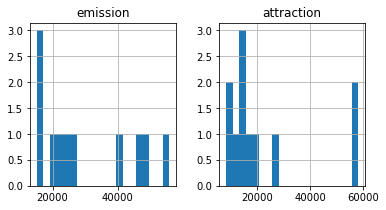

In [9]:
sm.zones[['emission', 'attraction']].hist(bins=20, figsize=(6,3))

In [10]:
# Now we need to introduce our demand segments.
# Car owners and PT captives is a good start.
# Other common demand segments are trip purposes, income groups, age groups.
sm.segments = ['car_owner', 'pt_captive']
car_ownership = 0.75 #Mobilitätsumfrage FL 2022
sm.zones[('car_owner', 'emission')] = sm.zones['emission'] * car_ownership
sm.zones[('pt_captive', 'emission')] = sm.zones['emission'] * (1-car_ownership)

sm.zones[('car_owner', 'attraction')] = sm.zones['attraction'] * car_ownership
sm.zones[('pt_captive', 'attraction')] = sm.zones['attraction'] * (1-car_ownership)

In [11]:
# Cast columns to integer
sm.zones[('car_owner', 'emission')] = sm.zones[('car_owner', 'emission')].astype(int)
sm.zones[('car_owner', 'attraction')] = sm.zones[('car_owner', 'attraction')].astype(int)

sm.zones[('pt_captive', 'emission')] = sm.zones[('pt_captive', 'emission')].astype(int)
sm.zones[('pt_captive', 'attraction')] = sm.zones[('pt_captive', 'attraction')].astype(int)

In [12]:
# Delete the non-segmented columns to prevent errors
del sm.zones['emission']
del sm.zones['attraction']
sm.zones.sample()

,type,pop,name,emp,id,AREA,pop_dens,emp_dens,geometry,POIs,"(car_owner, emission)","(pt_captive, emission)","(car_owner, attraction)","(pt_captive, attraction)"
index,,,,,,,,,,,,,,
zone_3,multipolygon,12160,Nordstadt,3834,2,4032961.52,0.003,0.00095,"MULTIPOLYGON (((9.42829 54.80005, 9.42828 54.8...",18,11339,3779,10903,3634


## Step distribution

Once we have emission and attraction, we want to know the volumes per OD-pair. We can use the `step_distribution` function from quetzal. It uses the doubly constrained distribution (no probabilistic Logit approach), which is an iterative process where emissions and attractions are matched so that, on average, the minimal resistance for the whole system is found. Talking about resistance: an important input parameter is the impedance matrix, giving resistances between every OD-pair. Resistance can be time, but also cost or other utility/disutility quantifications.

Calibration of this step (not performed in this toy model) requires to change emission and attraction values or the impedance matrix

In [13]:
# Now, we need an impedance matrix for car and PT, respectively.
# Use time as resistance value, but distance or cost are thinkable, too
car_imp_matrix = sm.car_los[['origin', 'destination', 'time']].set_index(
    ['origin','destination']).unstack()
# Assign a resistance for staying in the home cell
car_imp_matrix = car_imp_matrix.replace(0, 120)

In [14]:
car_imp_matrix.head(3)

time                                                      \
destination      zone_0       zone_1      zone_10       zone_2       zone_3   
origin                                                                        
zone_0       120.000000   862.716080   930.436274   985.844353   768.779451   
zone_1       862.716080   120.000000  1181.969198  1303.423241  1371.078739   
zone_10      956.333474  1182.402132   120.000000   399.296495   949.449193   

                                                                              \
destination       zone_4       zone_5       zone_6       zone_7       zone_8   
origin                                                                         
zone_0       1366.339092   517.204336  1434.280108  1096.373953  1639.823078   
zone_1       1587.872723  1066.552424  1751.858997  1106.099347  1909.691852   
zone_10       844.562777   579.457221   847.732251   929.257274  1028.836878   

                          
destination       zone_9  
origin                    
zone_0        514.775329  
zone_1        586.757786  
zone_10      1069.966867

In [15]:
#impedance matrix walk
walk_imp_matrix = sm.walk_los[['origin', 'destination', 'time']].set_index(
    ['origin','destination']).unstack()
# Assign a resistance for staying in the home cell
walk_imp_matrix = walk_imp_matrix.replace(0, 120)

In [16]:
walk_imp_matrix.head(3)

time                                                      \
destination       zone_0       zone_1      zone_10       zone_2       zone_3   
origin                                                                         
zone_0        120.000000  2683.769261  2677.143919  3200.883655  2303.367050   
zone_1       2699.064221   120.000000  3803.787397  4509.855367  4655.262361   
zone_10      2677.143919  3803.787397   120.000000  1107.726802  2950.210911   

                                                                              \
destination       zone_4       zone_5       zone_6       zone_7       zone_8   
origin                                                                         
zone_0       4517.100030  1542.871248  4839.807217  3302.897568  5420.837867   
zone_1       5276.092256  3507.314264  6148.778928  3289.722297  6466.778458   
zone_10      1977.081270  1307.024100  2746.650364  2162.522722  3005.698787   

                          
destination       zone_9  
origin                    
zone_0       1267.638604  
zone_1       1545.011065  
zone_10      3158.602640

In [17]:
#impedance matrix bike
bike_imp_matrix = sm.bike_los[['origin', 'destination', 'time']].set_index(
    ['origin','destination']).unstack()
# Assign a resistance for staying in the home cell
bike_imp_matrix = bike_imp_matrix.replace(0, 120)

In [18]:
bike_imp_matrix.head(3)

time                                                     \
destination       zone_0      zone_1      zone_10       zone_2       zone_3   
origin                                                                        
zone_0        120.000000  1243.76887  1303.153297  1385.544942   984.285235   
zone_1       1249.651547   120.00000  1694.348037  1917.828666  1916.085605   
zone_10      1351.964035  1691.75659   120.000000   584.770200  1367.105754   

                                                                              \
destination       zone_4       zone_5       zone_6       zone_7       zone_8   
origin                                                                         
zone_0       1975.842749   717.133409  2040.984338  1510.723619  2331.006384   
zone_1       2299.667642  1513.102455  2573.268061  1518.818266  2775.095922   
zone_10       982.446686   759.623497  1240.209595  1169.957058  1407.262843   

                          
destination       zone_9  
origin                    
zone_0        706.016038  
zone_1        769.974093  
zone_10      1401.266712

In [19]:
# In the PT case we have to take the minimum time per OD pair,
# because we have multiple routes
pt_imp_matrix = sm.pt_los.groupby(
    ['origin', 'destination']).agg({'time': 'min'}).unstack()

In [20]:
pt_imp_matrix = pt_imp_matrix.replace(0, 120)
pt_imp_matrix.head(3)

time                                                      \
destination       zone_0       zone_1      zone_10       zone_2       zone_3   
origin                                                                         
zone_0        120.000000  2612.729259  3018.164411  3671.841493  3016.316640   
zone_1       2612.729259   120.000000  2430.569215  3494.141183  4166.971462   
zone_10      3119.664411  2458.842581   120.000000  1238.230849  2560.784214   

                                                                              \
destination       zone_4       zone_5       zone_6       zone_7       zone_8   
origin                                                                         
zone_0       5073.127321  2426.545648  4226.677593  3750.905534  3906.567053   
zone_1       4485.532125  3155.779281  3876.545170  2952.322211  3318.971858   
zone_10      3307.720272  2055.684836  2047.527388  2620.229335  2297.884556   

                          
destination       zone_9  
origin                    
zone_0        805.720433  
zone_1       1564.064235  
zone_10      2330.688900

In [21]:
# We can perform the quetzal distribution function for all
# our demand segments simultaniously, saving us post-processing.
# Therefore, we need a dictionary with all parameters
distr_params = {'deterrence_matrix': {'car_owner': car_imp_matrix,
                                      'pt_captive': pt_imp_matrix,}}
sm.step_distribution(segmented=True, **distr_params)

car_owner
pt_captive


In [22]:
#distr_params

In [23]:
sm.volumes.head(3)

,origin,destination,car_owner,pt_captive,all
0,zone_0,zone_0,1563.532648,157.267049,1720.799697
1,zone_0,zone_1,2368.930449,913.022527,3281.952976
2,zone_0,zone_2,3740.480993,1342.824461,5083.305454


## Step mode choice

For mode choice we apply a nested logit model. In modeling terms, this step can be understood as the "logit" step, because the resulting utilities could also be used to compute the impedance matrix from above. You will see, that the logit step is entirely independent of the volumes and could, thus, be done earlier.

In [24]:
# First, we need parameters for our logit model.
# We define the nesting structure (i.e. choice tree)
# and the beta parameters which should come from a calibration
# using a mobility survey.
sm.preparation_logit(time= -0.00055, # beta_t --> los attributes /manuelle kallibrierung der estimation of demand --> Muss negativ sein!
                     price= -1, # beta_c  --> los attributes /manuelle kallibrierung der estimation of demand --> Muss negativ sein!
                     transfers=0, # we don't want the number of transfers matter (even though it does sometimes) --> los attributes /manuelle kallibrierung der estimation of demand --> muss negativ sein! davor 0
                     mode=1, # theta_root (ausm nested logit) --> max. 1 abr > 0
                     #pt_mode=0.5, # theta_pt (nest parameter for PT)
                     pt_path=0.1, # theta_path (nest parameter for different paths of one PT option)
                     segments=sm.segments
)
# For nest parameters you should take 1 >= mode >= pt_mode >= pt_path > 0

In [25]:
# Now we have generated the nesting structure table
# Can differ by demand segment, if you want
sm.mode_nests

segment,root,car_owner,pt_captive
route_type,,,
root,NaN,NaN,NaN
bus,pt,pt,pt
car,root,root,root
walk,root,root,root
pt,root,root,root


In [26]:
#so legst du eine neue Zeile mit einer neuen nest an, die eine Kopie der Zeile 'car' ist
sm.mode_nests.loc['cycling'] = sm.mode_nests.loc['car'].copy()

In [27]:
sm.mode_nests

segment,root,car_owner,pt_captive
route_type,,,
root,NaN,NaN,NaN
bus,pt,pt,pt
car,root,root,root
walk,root,root,root
pt,root,root,root
cycling,root,root,root


In [28]:
# And the corresponding theta values
sm.logit_scales

#alles auf 1 setzen!

segment,root,car_owner,pt_captive
route_type,,,
root,1.0,1.0,1.0
bus,0.1,0.1,0.1
car,0.0,0.0,0.0
walk,0.0,0.0,0.0
pt,1.0,1.0,1.0


In [29]:
#so legst du eine neue Zeile mit einer neuen choice option an, die eine Kopie der Zeile 'car' ist
sm.logit_scales.loc['cycling'] = sm.logit_scales.loc['car'].copy() 


In [30]:
sm.logit_scales

segment,root,car_owner,pt_captive
route_type,,,
root,1.0,1.0,1.0
bus,0.1,0.1,0.1
car,0.0,0.0,0.0
walk,0.0,0.0,0.0
pt,1.0,1.0,1.0
cycling,0.0,0.0,0.0


In [31]:
sm.logit_scales['root'] = 1
sm.logit_scales['car_owner'] = 1
sm.logit_scales['pt_captive'] = 1

In [32]:
sm.logit_scales.loc['bus'] = 1

In [33]:
sm.logit_scales

segment,root,car_owner,pt_captive
route_type,,,
root,1,1,1
bus,1,1,1
car,1,1,1
walk,1,1,1
pt,1,1,1
cycling,1,1,1


In [34]:
#NEUE TABELLENEINTÄGE MÜSSEN NOCH BEARBEITET WERDEN
#so bearbeitest du einen bestimmten Eintrag in der Matrix und setzt ihn auf 2 
#sm.logit_scales.loc['Zeilenname', 'spaltenname'] = 2 
# so bearbeitest du die ganze Zeile und setzt sie auf 2
#sm.logit_scales.loc['new_option'] = 2 
# so bearbeitest du die ganze Spalte und setzt sie auf 2
#sm.logit_scales['car'] = 2 

In [35]:
# And the Alternative-Specific-Constants (ASC)
# We have to prevent PT captives from using a car
sm.mode_utility.loc[ 'car', 'pt_captive'] = -100 #-100 #statischer Anteil 
sm.mode_utility

segment,root,car_owner,pt_captive
route_type,,,
root,0,0,0
bus,0,0,0
car,0,0,-100
walk,0,0,0


In [36]:
sm.mode_utility.loc['cycling'] = sm.logit_scales.loc['walk'].copy() 

In [37]:
sm.mode_utility

segment,root,car_owner,pt_captive
route_type,,,
root,0,0,0
bus,0,0,0
car,0,0,-100
walk,0,0,0
cycling,1,1,1


In [38]:
sm.mode_utility.loc['cycling'] = 0

In [39]:
sm.mode_utility

segment,root,car_owner,pt_captive
route_type,,,
root,0,0,0
bus,0,0,0
car,0,0,-100
walk,0,0,0
cycling,0,0,0


In [40]:
#Mittelwert aller Fahrzwecke aus MiD
sm.mode_utility.loc[ 'bus', 'car_owner'] = -2.999641523
sm.mode_utility.loc[ 'bus', 'pt_captive'] = 1.913239586
sm.mode_utility.loc[ 'car', 'car_owner'] = -2.999641523
sm.mode_utility.loc[ 'walk', 'car_owner'] = -4.663428861
sm.mode_utility.loc[ 'cycling', 'car_owner'] = -4.663428861
sm.mode_utility.loc[ 'cycling', 'pt_captive'] = -1.632390323
sm.mode_utility.loc[ 'walk', 'pt_captive'] = -1.632390323

In [41]:
sm.mode_utility

segment,root,car_owner,pt_captive
route_type,,,
root,0,0.000000,0.00000
bus,0,-2.999642,1.91324
car,0,-2.999642,-100.00000
walk,0,-4.663429,-1.63239
cycling,0,-4.663429,-1.63239


In [42]:
# And the beta parameters
# The column 'mode_utility' refers to the weight of the ASC table
# Delete the transfers attribute because we don't want it in our model formulation
sm.utility_values.drop('ntransfers', inplace=True)
sm.utility_values

segment,root,car_owner,pt_captive
value,,,
time,-0.00055,-0.00055,-0.00055
price,-1.00000,-1.00000,-1.00000
mode_utility,1.00000,1.00000,1.00000


In [43]:
#Anpassung der Werte
#mit Auto
sm.utility_values.loc[ 'price', 'car_owner'] = -1
sm.utility_values.loc[ 'time', 'car_owner'] = -0.000103125

#ohne Auto
sm.utility_values.loc[ 'price', 'pt_captive'] = -0.3125
sm.utility_values.loc[ 'time', 'pt_captive'] = -0.000103125

In [44]:
sm.utility_values

segment,root,car_owner,pt_captive
value,,,
time,-0.00055,-0.000103,-0.000103
price,-1.00000,-1.000000,-0.312500
mode_utility,1.00000,1.000000,1.000000


In [45]:
sm.__dict__.keys()

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'car_los', 'cycling_los', 'cycle_los', 'walk_los', 'jsons', 'bike_los', 'volumes', 'pt_los', 'footpath_links', 'dead_ends', 'circular_lines', 'broken_sequences', 'bikelane_links', 'footpath_nodes', 'bikelane_nodes', 'mode_utility'])

In [46]:
sm.car_los.head(3)

,origin,destination,time,path,node_path,link_path,ntlegs,length,route_types,route_type,price
index,,,,,,,,,,,
0,zone_0,zone_0,0.000000,[zone_0],[],[],[],0.000,[car],car,0.000000
1,zone_0,zone_1,862.716080,"[zone_0, 455196992, 455190153, 455188901, 2739...","[455196992, 455190153, 455188901, 273956492, 4...","[7139, 7131, 5471, 7134, 7141, 5467, 5504, 787...","[[zone_0, 455196992], [232927756, zone_1]]",3258.348,[car],car,0.423585
2,zone_0,zone_10,930.436274,"[zone_0, 272871873, 272871697, 272871872, 2739...","[272871873, 272871697, 272871872, 273951209, 4...","[5418, 5423, 5460, 7128, 5463, 5483, 5350, 579...","[[zone_0, 272871873], [268370787, zone_10]]",4191.659,[car],car,0.544916


In [47]:
sm.walk_los.head(3)

,origin,destination,time,path,node_path,link_path,ntlegs,length,route_types,route_type,price
index,,,,,,,,,,,
0,zone_0,zone_0,0.000000,[zone_0],[],[],[],0.000,[walk],walk,0
1,zone_0,zone_1,2683.769261,"[zone_0, 455190153, 1783775397, 1783775384, 17...","[455190153, 1783775397, 1783775384, 1783775380...","[48218, 48215, 48211, 36435, 43110, 40855, 408...","[[zone_0, 455190153], [232927756, zone_1]]",3234.273,[walk],walk,0
2,zone_0,zone_10,2677.143919,"[zone_0, 272871873, 272871697, 1783775445, 273...","[272871873, 272871697, 1783775445, 273957495, ...","[35341, 48242, 35454, 35354, 35459, 40804, 482...","[[zone_0, 272871873], [268370790, zone_10]]",3322.198,[walk],walk,0


In [48]:
sm.bike_los.head(3)

,origin,destination,time,path,node_path,link_path,ntlegs,length,route_types,route_type,price
index,,,,,,,,,,,
0,zone_0,zone_0,0.000000,[zone_0],[],[],[],0.000,[cycling],cycling,0
1,zone_0,zone_1,1243.768870,"[zone_0, 272871873, 272871697, 1783775445, 273...","[272871873, 272871697, 1783775445, 273957495, ...","[32879, 44860, 32981, 37932, 44836, 44833, 448...","[[zone_0, 272871873], [654163515, zone_1]]",3578.344,[cycling],cycling,0
2,zone_0,zone_10,1303.153297,"[zone_0, 272871873, 272871697, 1784407787, 272...","[272871873, 272871697, 1784407787, 272871872, ...","[32879, 44895, 32881, 32961, 44875, 37888, 449...","[[zone_0, 272871873], [268370790, zone_10]]",3676.082,[cycling],cycling,0


In [49]:
# Now, add segment specific ASC column to LoS table.
# But first we have to generate a combined LoS table
sm.los = pd.concat([sm.pt_los, sm.car_los, sm.walk_los, sm.bike_los]).reset_index(drop=True)
sm.los['route_types'] = sm.los['route_types'].apply(tuple)# bugfix
sm.analysis_mode_utility(how='main', # how refers to how to calculate the ASC from multiple paths
                         segment=None) # automatically iterates through segments

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 169.18it/s]


In [50]:
sm.los

,origin,destination,gtime,path,reversed,pathfinder_session,broken_modes,boardings,alightings,node_path,...,boarding_time,time,access_length,footpath_length,in_vehicle_length,length,price,mode_utility,"(car_owner, utility)","(pt_captive, utility)"
0,zone_0,zone_0,0.000000,[zone_0],False,mode_breaker,[bus],[],[],[],...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.875,-1.63239,-6.538429,-2.218328
1,zone_0,zone_1,2612.729259,"[zone_0, n_67, n_90, n_272, zone_1]",False,mode_breaker,[bus],[],[],"[n_67, n_90, n_272]",...,0.0,2612.729259,1259.436771,1468.241498,0.0,2727.678268,1.875,-1.63239,-6.807867,-2.487766
2,zone_0,zone_10,3959.650395,"[zone_0, n_171, n_201, n_73, n_103, n_130, n_2...",False,mode_breaker,[bus],[],[],"[n_171, n_201, n_73, n_103, n_130, n_233, n_83...",...,0.0,3959.650395,937.405666,2687.714920,0.0,3625.120585,1.875,-1.63239,-6.946768,-2.626667
3,zone_0,zone_2,4973.309895,"[zone_0, n_171, n_43, n_221, n_179, n_32, n_22...",False,mode_breaker,[bus],[],[],"[n_171, n_43, n_221, n_179, n_32, n_222, n_254...",...,0.0,4973.309895,896.715487,3546.528913,0.0,4443.244400,1.875,-1.63239,-7.051301,-2.731200
4,zone_0,zone_3,3825.720806,"[zone_0, n_165, n_156, n_71, n_142, n_198, n_1...",False,mode_breaker,[bus],[],[],"[n_165, n_156, n_71, n_142, n_198, n_116]",...,0.0,3825.720806,439.661643,2797.446864,0.0,3237.108507,1.875,-1.63239,-6.932956,-2.612855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,zone_9,zone_5,NaN,"[zone_9, 261602220, 261607602, 1828519845, 182...",NaN,NaN,NaN,NaN,NaN,"[261602220, 261607602, 1828519845, 1828519855,...",...,NaN,1059.278361,NaN,NaN,NaN,3191.612000,0.000,-1.63239,-4.772667,-1.741628
568,zone_9,zone_6,NaN,"[zone_9, 261602220, 261607602, 1828519845, 182...",NaN,NaN,NaN,NaN,NaN,"[261602220, 261607602, 1828519845, 1828519855,...",...,NaN,2274.922982,NaN,NaN,NaN,7352.445000,0.000,-1.63239,-4.898030,-1.866992
569,zone_9,zone_7,NaN,"[zone_9, 261602220, 261607602, 1828519845, 182...",NaN,NaN,NaN,NaN,NaN,"[261602220, 261607602, 1828519845, 1828519855,...",...,NaN,1457.997311,NaN,NaN,NaN,4159.411000,0.000,-1.63239,-4.813785,-1.782746
570,zone_9,zone_8,NaN,"[zone_9, 261602220, 261607602, 1828519845, 182...",NaN,NaN,NaN,NaN,NaN,"[261602220, 261607602, 1828519845, 1828519855,...",...,NaN,2476.750844,NaN,NaN,NaN,7615.184000,0.000,-1.63239,-4.918844,-1.887805


In [51]:
#LoS Tabelle nach Spalte Länge sortiert
#sm.los.sort_values(by=['length']).head(50) #aufsteigend
#sm.los.sort_values(by=['length'], ascending=False) #absteigend

In [52]:
# Finally, run the logit model
sm.initialize_logit()
# If you want to know what parameters you can give to the function,
# look into the code. You can find the most important functions in
# the quetzal/model/transportmodel.py file, which refers to sub-functions
# by importing them from other quetzal files
sm.step_logit()

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 18.23it/s]


In [53]:
# The result is a utilities table
sm.utilities.head(3)

route_type,origin,destination,segment,root,cycling,walk,car,pt,bus
0,zone_0,zone_0,car_owner,-2.657550,-4.663429,-4.520754,-2.999642,-inf,-inf
1,zone_0,zone_0,pt_captive,-0.693718,-1.632390,-1.189897,-100.000000,-inf,-inf
2,zone_0,zone_1,car_owner,-3.070713,-4.791693,-4.796540,-3.512194,-inf,-inf


In [54]:
# and the probabilities
sm.probabilities #.head(50)

route_type,origin,destination,segment,root,cycling,walk,car,pt,bus
0,zone_0,zone_0,car_owner,1,0.134542,0.155175,7.102833e-01,0.000000,0.000000
1,zone_0,zone_0,pt_captive,1,0.391147,0.608853,7.444403e-44,0.000000,0.000000
2,zone_0,zone_1,car_owner,1,0.178891,0.178026,6.430833e-01,0.000000,0.000000
3,zone_0,zone_1,pt_captive,1,0.426384,0.573616,7.393827e-44,0.000000,0.000000
4,zone_0,zone_10,car_owner,1,0.171109,0.168456,5.443602e-01,0.116074,0.116074
...,...,...,...,...,...,...,...,...,...
17,zone_4,zone_7,pt_captive,1,0.435168,0.564832,7.007893e-44,0.000000,0.000000
18,zone_4,zone_8,car_owner,1,0.164114,0.158674,5.712156e-01,0.105996,0.105996
19,zone_4,zone_8,pt_captive,1,0.056648,0.071513,9.708864e-45,0.871839,0.871839
20,zone_4,zone_9,car_owner,1,0.205433,0.174886,4.896715e-01,0.130010,0.130010


In [55]:
# Moreover, you have now probabilities assigned to your paths!
sm.los.head(3)

,origin,destination,gtime,path,reversed,pathfinder_session,broken_modes,boardings,alightings,node_path,...,access_length,footpath_length,in_vehicle_length,length,price,mode_utility,"(car_owner, utility)","(pt_captive, utility)","(car_owner, probability)","(pt_captive, probability)"
0,zone_0,zone_0,0.000000,[zone_0],False,mode_breaker,[bus],[],[],[],...,0.000000,0.000000,0.0,0.000000,1.875,-1.63239,-6.538429,-2.218328,0.020633,0.217706
1,zone_0,zone_1,2612.729259,"[zone_0, n_67, n_90, n_272, zone_1]",False,mode_breaker,[bus],[],[],"[n_67, n_90, n_272]",...,1259.436771,1468.241498,0.0,2727.678268,1.875,-1.63239,-6.807867,-2.487766,0.023822,0.206073
2,zone_0,zone_10,3959.650395,"[zone_0, n_171, n_201, n_73, n_103, n_130, n_2...",False,mode_breaker,[bus],[],[],"[n_171, n_201, n_73, n_103, n_130, n_233, n_83...",...,937.405666,2687.714920,0.0,3625.120585,1.875,-1.63239,-6.946768,-2.626667,0.019952,0.022931


## Step assignment

This step combines the path probabilities with the volumes and loads them onto the networks.

In [56]:
sm.volumes.head(2)

,origin,destination,car_owner,pt_captive,all
0,zone_0,zone_0,1563.532648,157.267049,1720.799697
1,zone_0,zone_1,2368.930449,913.022527,3281.952976


In [57]:
sm.los.sample()

,origin,destination,gtime,path,reversed,pathfinder_session,broken_modes,boardings,alightings,node_path,...,access_length,footpath_length,in_vehicle_length,length,price,mode_utility,"(car_owner, utility)","(pt_captive, utility)","(car_owner, probability)","(pt_captive, probability)"
334,zone_0,zone_3,NaN,"[zone_0, 272871873, 272871697, 1784407787, 272...",NaN,NaN,NaN,NaN,NaN,"[272871873, 272871697, 1784407787, 272871872, ...",...,NaN,NaN,NaN,2992.33,0.0,-1.63239,-4.900964,-1.869925,0.145054,0.048671


In [58]:
# We want to do an assignment for cars and PT seperately
# (although there is a wrapper function in quetzal)
# Therefore, we must transfer the path probabilities to pt_los and car_los
sm.car_los = sm.los.loc[sm.los['route_type']=='car']
sm.pt_los = sm.los.loc[sm.los['route_type']!='car']
sm.walk_los = sm.los.loc[sm.los['route_type']=='walk']
sm.bike_los = sm.los.loc[sm.los['route_type']=='cycling']

In [59]:
sm.los.columns

Index([                     'origin',                 'destination',
                             'gtime',                        'path',
                          'reversed',          'pathfinder_session',
                      'broken_modes',                   'boardings',
                        'alightings',                   'node_path',
                         'link_path',                   'footpaths',
                            'ntlegs',                   'transfers',
                    'boarding_links',             'alighting_links',
                          'all_walk',                  'ntransfers',
                    'time_link_path',            'length_link_path',
                       'route_types',                  'route_type',
                       'access_time',               'footpath_time',
                   'in_vehicle_time',                'waiting_time',
                     'boarding_time',                        'time',
                     'access_lengt

In [60]:
sm.volumes 
#origin destionation hier gleich wie bei los tabelle. los nach fahrrad filtern probability von car owner x demad volumes je OD Paar je demand segment 

,origin,destination,car_owner,pt_captive,all
0,zone_0,zone_0,1563.532648,157.267049,1720.799697
1,zone_0,zone_1,2368.930449,913.022527,3281.952976
2,zone_0,zone_2,3740.480993,1342.824461,5083.305454
3,zone_0,zone_3,2952.344584,1084.815733,4037.160316
4,zone_0,zone_4,1478.018841,567.735907,2045.754748
...,...,...,...,...,...
116,zone_10,zone_6,1504.753326,696.992542,2201.745868
117,zone_10,zone_7,1390.675825,498.008001,1888.683826
118,zone_10,zone_8,1830.977573,810.118669,2641.096242
119,zone_10,zone_9,2284.690166,739.206994,3023.897160


In [61]:
sm.pt_los=sm.pt_los.append(sm.walk_los) #die walk tabelle bei der pt_los tabelle mit anhängen

In [62]:
# PT first
sm.segmented_pt_assignment(split_by='route_type', # identify from which route type the load comes
                           on_road_links=False, # load bus traffic to the road network (requires casted networks)
                           walk_on_road=True, 
                           path_column='link_path' # pt_los column with the path list
                          )
#mit los Tabelle

pt_captive: 100%|█████████████████████████████████| 2/2 [00:00<00:00, 11.61it/s]


In [63]:
# Now cars
sm.segmented_car_assignment() #probabilities für car x volume Tabelle; ergebnisse in car_los Tabelle; 

pt_captive: 100%|█████████████████████████████████| 2/2 [00:00<00:00, 87.43it/s]


In [64]:
sm.loaded_links.loc[sm.loaded_links['load']!=0].sample()

,trip_id,a,b,link_sequence,time,headway,pattern_id,route_id,service_id,direction_id,...,length,duration,cost,origin,destination,geometry,"(load, walk)","(load, bus)","(load, cycling)",load
index,,,,,,,,,,,,,,,,,,,,,
link_592,302_1,n_14,n_109,2,120.0,1763,302_1,302,59,0,...,409.803,120.0,1001.5,n_14,n_109,"LINESTRING (9.47764 54.81378, 9.48101 54.81082)",0.0,2667.64767,0.0,2667.64767


In [65]:
sm.road_links.loc[sm.road_links[('all', 'car')]!=0].sample()

,a,b,length,time,walk_time,geometry,highway,"(car_owner, car)","(pt_captive, car)","(all, car)"
index,,,,,,,,,,
5630,654163527,274946838,328.505,56.315143,168.945429,"LINESTRING (9.40766 54.75896, 9.41104 54.76118)",tertiary,389.188941,2.098372e-42,389.188941


In [66]:
#sm.footpath_links.loc[sm.road_links[('all', 'walk')]!=0].sample()

In [67]:
sm.footpath_links.sample()
# --> demand segmente fehlen hier vgl. road_links

,a,b,length,time,walk_time,geometry,highway
index,,,,,,,
18146,1806271111,1806271044,30.755,22.1436,22.1436,"LINESTRING (9.43140 54.77586, 9.43119 54.77565)",path


In [68]:
sm.bikelane_links.sample()

,a,b,length,time,walk_time,geometry,highway
index,,,,,,,
7333,401871011,1868503669,12.843,3.556523,11.949918,"LINESTRING (9.41144 54.80450, 9.41132 54.80459)",living_street


In [69]:
sm.road_links.sample()

,a,b,length,time,walk_time,geometry,highway,"(car_owner, car)","(pt_captive, car)","(all, car)"
index,,,,,,,,,,
4574,264052108,264052111,383.802,65.794629,197.383886,"LINESTRING (9.44615 54.77860, 9.44708 54.77529)",residential,NaN,NaN,0.0


<AxesSubplot:>

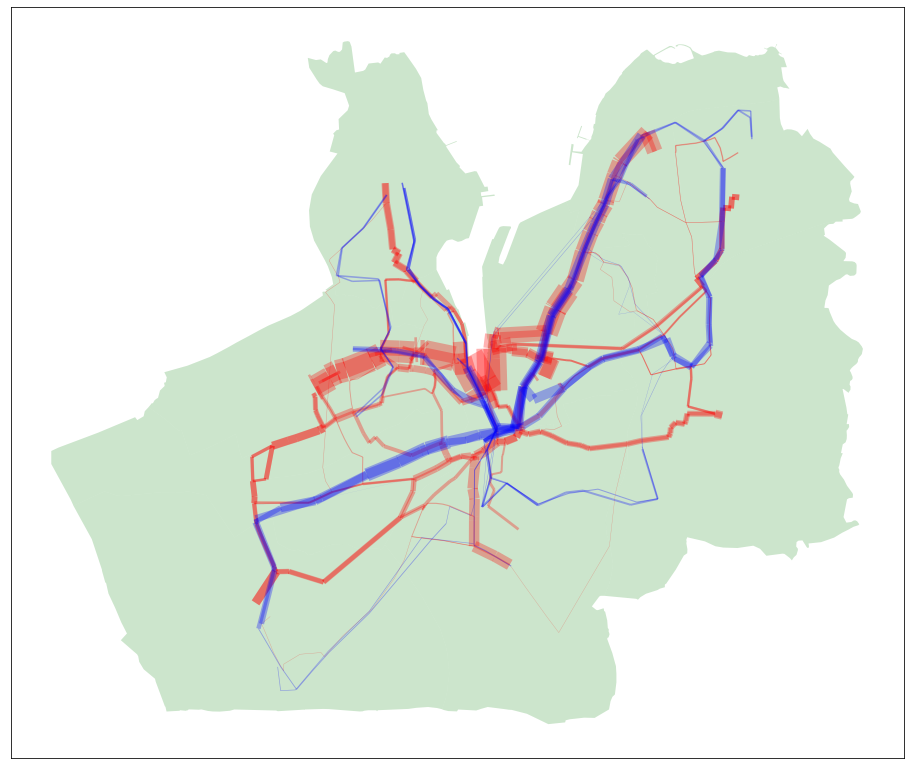

In [70]:
sm.loaded_links = gpd.GeoDataFrame(sm.loaded_links)
sm.road_links = gpd.GeoDataFrame(sm.road_links)
scaler = max(sm.loaded_links['load'].max(), sm.road_links[('all', 'car')].max()) / 35
sm.loaded_links.plot(alpha=.3, color='blue', linewidth=list(sm.loaded_links['load']/scaler),
    ax=sm.road_links.plot(alpha=.3, color='red', linewidth=list(sm.road_links[('all', 'car')]/scaler),
    #ax=sm.footpath_links.plot(alpha=.3, color='orange', linewidth=list(sm.footpath_links[('all', 'walk')]/scaler), --> klammer in letzte Zeile
        ax=sm.plot('zones', alpha=.2, color='green', figsize=(16,16))))
#zonen als letztes

<AxesSubplot:>

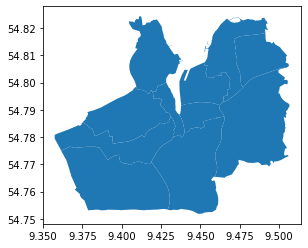

In [71]:
gpd.GeoDataFrame(sm.zones).plot()


In [72]:
# Summary of LoS table using a quetzal function
# All attributes are multiplied with path probabilities
od_sum = sm.summary_od(costs=['price', # EUR per person
                              'time', # seconds per ride
                              'in_vehicle_time', # seconds per ride
                              'length', # Meter distance
                              'ntransfers']) # per ride

In [73]:
# Compute passenger kilometer
for seg in sm.segments + ['root']:
    od_sum[(seg, 'pkm')] = od_sum[(seg, 'volume')] * od_sum[(seg, 'length')] / 1000
    # Adjust units of other indicators
    od_sum[(seg, 'in_vehicle_time')] = od_sum[(seg, 'in_vehicle_time')] / 3600
    od_sum[(seg, 'time')] = od_sum[(seg, 'time')] / 3600
    od_sum[(seg, 'length')] = od_sum[(seg, 'length')] / 1000

In [74]:
od_sum.sample(8)

segment                       car_owner                                      \
sum                              volume     price      time in_vehicle_time   
origin destination mode                                                       
zone_8 zone_4      walk      172.371153  0.069116  0.276568             0.0   
zone_4 zone_5      walk     1429.396198  0.071134  0.302909             0.0   
zone_3 zone_5      car      1449.466572  0.206568  0.091548             0.0   
zone_9 zone_7      cycling    31.750064  0.000000  0.073833             0.0   
zone_5 zone_6      walk      838.877474  0.070847  0.343357             0.0   
zone_8 zone_1      walk      254.937488  0.065760  0.656883             0.0   
zone_4 zone_4      car        52.814815  0.000000  0.000000             0.0   
zone_6 zone_5      cycling  1820.929249  0.000000  0.073944             0.0   

segment                                            pt_captive                \
sum                           length ntransfers        volume         price   
origin destination mode                                                       
zone_8 zone_4      walk     1.123216        0.0  2.083291e+01  8.605171e-02   
zone_4 zone_5      walk     1.304920        0.0  2.113874e+02  8.927228e-02   
zone_3 zone_5      car      1.588985        0.0  7.370087e-42  3.212215e-45   
zone_9 zone_7      cycling  0.758278        0.0  3.527512e+00  0.000000e+00   
zone_5 zone_6      walk     1.522674        0.0  1.010506e+02  7.314251e-02   
zone_8 zone_1      walk     2.927256        0.0  2.268103e+01  5.158880e-02   
zone_4 zone_4      car      0.000000        0.0  5.222115e-43  0.000000e+00   
zone_6 zone_5      cycling  0.823382        0.0  1.654340e+02  0.000000e+00   

segment                                                   ...             \
sum                                 time in_vehicle_time  ... ntransfers   
origin destination mode                                   ...              
zone_8 zone_4      walk     1.360142e-01             0.0  ...        0.0   
zone_4 zone_5      walk     1.496590e-01             0.0  ...        0.0   
zone_3 zone_5      car      1.423606e-45             0.0  ...        0.0   
zone_9 zone_7      cycling  2.349294e-02             0.0  ...        0.0   
zone_5 zone_6      walk     1.396940e-01             0.0  ...        0.0   
zone_8 zone_1      walk     1.948039e-01             0.0  ...        0.0   
zone_4 zone_4      car      0.000000e+00             0.0  ...        0.0   
zone_6 zone_5      cycling  2.108506e-02             0.0  ...        0.0   

segment                            root                                      \
sum                              volume     price      time in_vehicle_time   
origin destination mode                                                       
zone_8 zone_4      walk      193.204060  0.070942  0.261412             0.0   
zone_4 zone_5      walk     1640.783610  0.073471  0.283166             0.0   
zone_3 zone_5      car      1449.466572  0.206568  0.091548             0.0   
zone_9 zone_7      cycling    35.277576  0.000000  0.068799             0.0   
zone_5 zone_6      walk      939.928058  0.071094  0.321461             0.0   
zone_8 zone_1      walk      277.618522  0.064602  0.619132             0.0   
zone_4 zone_4      car        52.814815  0.000000  0.000000             0.0   
zone_6 zone_5      cycling  1986.363286  0.000000  0.069542             0.0   

segment                                            car_owner    pt_captive  \
sum                           length ntransfers          pkm           pkm   
origin destination mode                                                      
zone_8 zone_4      walk     1.058958        0.0   193.610092  1.098483e+01   
zone_4 zone_5      walk     1.213142        0.0  1865.247459  1.252559e+02   
zone_3 zone_5      car      1.588985        0.0  2303.180549  1.821101e-85   
zone_9 zone_7      cycling  0.706581        0.0    24.075364  8.511058e-01   
zone_5 

array([<AxesSubplot:ylabel='(car_owner, volume)'>,
       <AxesSubplot:ylabel='(pt_captive, volume)'>], dtype=object)

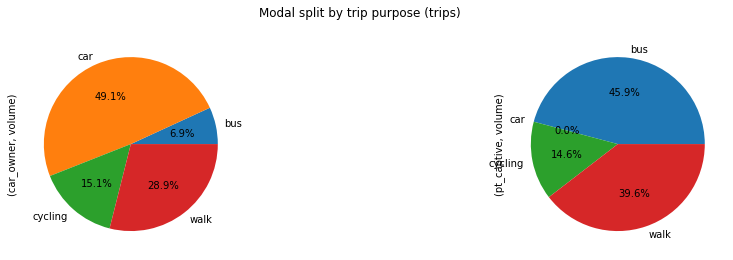

In [75]:
od_sum.loc[:, [(seg, 'volume') for seg in sm.segments]].groupby(level=2).sum().plot.pie(
    subplots=True, figsize=(16, 4), legend=False, title='Modal split by trip purpose (trips)', autopct = '%1.1f%%'
)

array([<AxesSubplot:ylabel='(car_owner, pkm)'>,
       <AxesSubplot:ylabel='(pt_captive, pkm)'>], dtype=object)

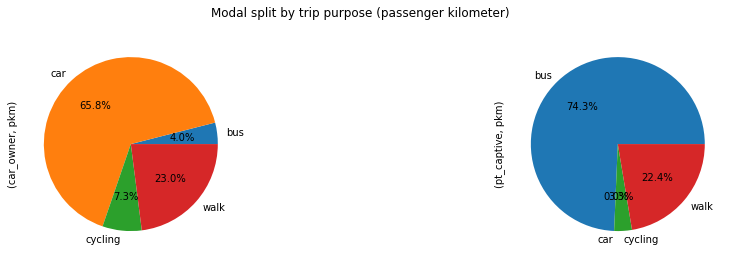

In [76]:
od_sum.loc[:, [(seg, 'pkm') for seg in sm.segments]].groupby(level=2).sum().plot.pie(
    subplots=True, figsize=(16, 4), legend=False, title='Modal split by trip purpose (passenger kilometer)', autopct = '%1.1f%%'
)

## Save model

In [77]:
# Save the od_sum as Excel
#with pd.ExcelWriter('../../outputs/od_summary.xlsx') as writer:  
with pd.ExcelWriter('od_summary.xlsx') as writer:
    od_sum.to_excel(writer, sheet_name='od_sum')

In [78]:
# make sure that all tables have unique indicies before saving
sm.probabilities.reset_index(inplace=True, drop=True)
sm.utilities.reset_index(inplace=True, drop=True)

In [79]:
sm.pt_los.reset_index(inplace=True)

In [80]:
sm.to_json(model_path + 'four_steps')

to_hdf(overwriting):  74%|████████████████▏     | 39/53 [00:03<00:00, 32.13it/s]

could not save geometry from table fare_rules
could not save geometry from table fare_attributes


to_hdf(overwriting): 100%|██████████████████████| 53/53 [00:14<00:00,  3.75it/s]

could not save attribute: parameters
